# 01\. Data Exploration of Strong-motion Station Dataset

**Author:** Hanif Kurniawan \
**Updated at:** November 8, 2025

#### **Objective**

The goal of this notebook is to perform an initial exploratory data analysis (EDA) on the strong-motion dataset. We aim to understand the structure, content, and quality of the data before proceeding to feature engineering and model training.

#### **Key Questions**

1.  What do the data look like? (Columns, data types)
2.  Are there significant missing values that need to be addressed?
3.  What are the statistical distributions of key features like `Mag` (Magnitude) and `PGA` (Peak Ground Acceleration)?
4.  Are there any obvious outliers or errors in the data?
5.  What initial challenges (e.g., data imbalance) can we identify?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df = pd.read_csv('../data/raw/data_passive.csv')

In [27]:
print(f"DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n" + "="*100 + "\n")

print("DataFrame Info:")
df.info()
print("\n" + "="*100 + "\n")

print("DataFrame Columns:")
all_columns = df.columns.tolist()
print(all_columns)
print("\n" + "="*100 + "\n")

print("DataFrame Null:")
df_nulls = df.isnull().sum()
print(df_nulls)
print("\n" + "="*100 + "\n")


DataFrame shape: 5369 rows, 125 columns


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Columns: 125 entries, Unnamed: 0 to CVAD_10
dtypes: float64(121), int64(2), object(2)
memory usage: 5.1+ MB


DataFrame Columns:
['Unnamed: 0', 'Event', 'Lat_Event', 'Lon_Event', 'Mag', 'Depth', 'Code', 'Type', 'SNR', 'Distance', 'Lat', 'Lon', 'PGA', 'PGV', 'PGD', 'PA_1', 'PV_1', 'PD_1', 'Tc_1', 'TP_1', 'Tva_1', 'PIv_1', 'IV2_1', 'CVAA_1', 'CVAV_1', 'CVAD_1', 'PA_2', 'PV_2', 'PD_2', 'Tc_2', 'TP_2', 'Tva_2', 'PIv_2', 'IV2_2', 'CVAA_2', 'CVAV_2', 'CVAD_2', 'PA_3', 'PV_3', 'PD_3', 'Tc_3', 'TP_3', 'Tva_3', 'PIv_3', 'IV2_3', 'CVAA_3', 'CVAV_3', 'CVAD_3', 'PA_4', 'PV_4', 'PD_4', 'Tc_4', 'TP_4', 'Tva_4', 'PIv_4', 'IV2_4', 'CVAA_4', 'CVAV_4', 'CVAD_4', 'PA_5', 'PV_5', 'PD_5', 'Tc_5', 'TP_5', 'Tva_5', 'PIv_5', 'IV2_5', 'CVAA_5', 'CVAV_5', 'CVAD_5', 'PA_6', 'PV_6', 'PD_6', 'Tc_6', 'TP_6', 'Tva_6', 'PIv_6', 'IV2_6', 'CVAA_6', 'CVAV_6', 'CVAD_6', 'PA_7', 'PV_7', 'PD_7

In [9]:
df.describe()

/home/hanif/miniforge/envs/torch/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Event,Lat_Event,Lon_Event,Mag,Depth,SNR,Distance,Lat,Lon,...,PV_10,PD_10,Tc_10,TP_10,Tva_10,PIv_10,IV2_10,CVAA_10,CVAV_10,CVAD_10
count,5369.000000,5.369000e+03,5369.000000,5369.000000,5369.000000,5369.000000,5364.000000,5369.000000,5369.000000,5369.000000,...,5.369000e+03,5.369000e+03,5369.000000,5.369000e+03,5369.000000,5.369000e+03,5.369000e+03,5369.000000,5369.000000,5369.000000
mean,2684.000000,2.022113e+13,-6.788489,106.082768,3.812013,34.745409,inf,140.605157,-6.189260,106.268651,...,5.594527e-04,1.394828e-03,18.768972,3.761061e-02,0.780368,6.913972e-310,2.844896e-06,1.038584,0.196624,0.696725
std,1550.041128,9.188270e+07,1.339873,1.944861,0.762601,42.802047,NaN,63.798122,1.263694,1.757429,...,1.510057e-03,2.401882e-03,11.020963,7.612248e-02,0.713987,0.000000e+00,5.856605e-05,3.765845,0.364784,1.233071
min,0.000000,2.022070e+13,-8.960000,98.590000,3.000000,5.000000,2.000000,3.280316,-7.967995,98.998597,...,6.732547e-07,4.441786e-07,0.184878,7.798277e-07,0.017733,6.913972e-310,7.649825e-13,0.002513,0.000243,0.000186
25%,1342.000000,2.022111e+13,-7.650000,105.270000,3.200000,10.000000,3.000000,87.134100,-6.866370,106.131900,...,2.589927e-05,2.625982e-05,9.346886,3.093992e-04,0.158339,6.913972e-310,6.023276e-10,0.233777,0.006224,0.012326
50%,2684.000000,2.022112e+13,-6.980000,106.890000,3.600000,16.200000,5.522635,142.281632,-6.499320,106.787222,...,2.680561e-04,3.780120e-04,18.762812,4.537110e-03,0.633807,6.913972e-310,1.169188e-07,0.478864,0.088769,0.166760
75%,4026.000000,2.022121e+13,-6.730000,107.250000,4.200000,37.700000,17.885776,191.955554,-6.175600,107.097200,...,7.144708e-04,1.620224e-03,28.603319,3.928219e-02,1.218827,6.913972e-310,8.487760e-07,1.198729,0.238674,0.805568
max,5368.000000,2.022123e+13,-1.110000,108.920000,6.700000,273.500000,inf,256.024120,0.840960,110.494510,...,7.018903e-02,2.265054e-02,39.233836,7.621173e-01,8.854753,6.913972e-310,3.890336e-03,144.598281,12.199261,13.374656


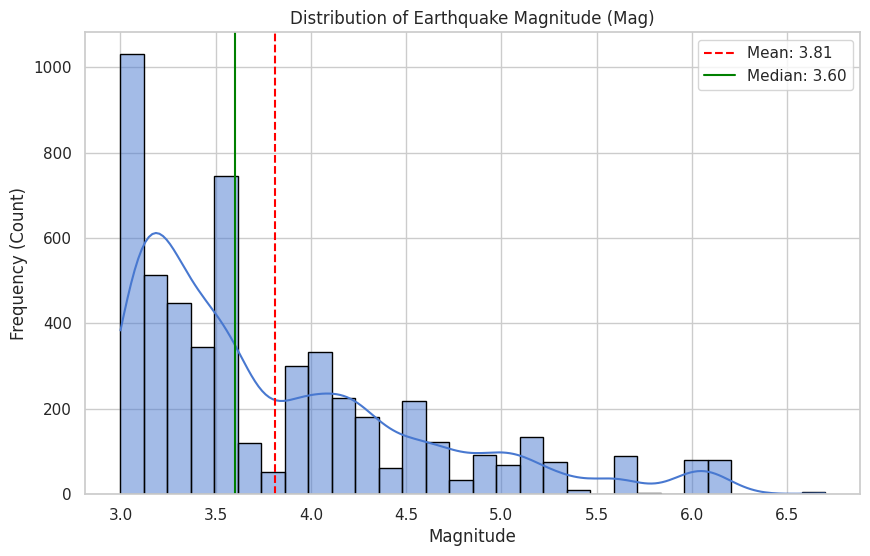

Mw Min:    3.0
Mw Max:    6.7
Mw Mean:   3.812013410318495
Mw Median: 3.6


In [ ]:
sns.histplot(df['Mag'], bins=30, kde=True, edgecolor='black')

mean_mag = df['Mag'].mean()
median_mag = df['Mag'].median()

plt.axvline(mean_mag, color='red', linestyle='--', label=f'Mean: {mean_mag:.2f}')
plt.axvline(median_mag, color='green', linestyle='-', label=f'Median: {median_mag:.2f}')

plt.title('Distribution of Earthquake Magnitude (Mag)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

print(f"Mw Min:    {df['Mag'].min()}")
print(f"Mw Max:    {df['Mag'].max()}")
print(f"Mw Mean:   {mean_mag}")
print(f"Mw Median: {median_mag}")

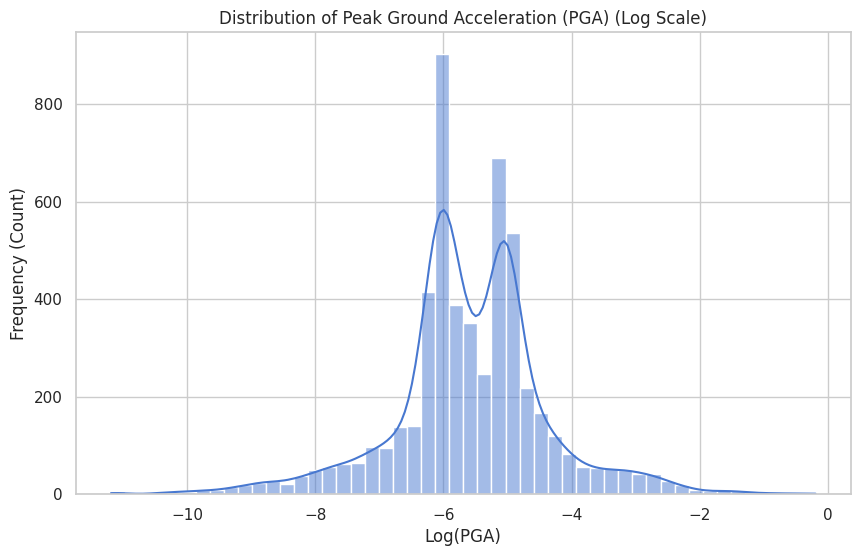

In [32]:
plt.figure(figsize=(10, 6))

sns.histplot(np.log(df['PGA'] + 1e-6), bins=50, kde=True)

plt.title('Distribution of Peak Ground Acceleration (PGA) (Log Scale)')
plt.xlabel('Log(PGA)')
plt.ylabel('Frequency (Count)')
plt.show()

#### **Key Findings**

1.  The dataset is heavily dominated by low-magnitude earthquakes. As seen in the histogram, the vast majority of events are clustered between **M3.0 and M4.0**, with a median magnitude of only **3.6**. Data for M5.5+ events, which are essential for learning about damaging ground motion, are extremely sparse.

2.  The distribution of our target variable, Peak Ground Acceleration (PGA), is not simple. Even when plotted on a log scale, it does not follow a normal (bell-curve) distribution. Instead, it is **bimodal**, showing two distinct peaks. This suggests our dataset is a mix of at least two different underlying populations, likely:
    * **Peak 1 (left):** A large cluster of very low PGA values corresponding to the "background noise" from the thousands of M3-M4 events.
    * **Peak 2 (right):** A smaller cluster of moderate PGA values corresponding to the fewer, more significant M4.5+ events.

#### **Feature Engineering**

The data that will be predicted is ofcourse `PGA`, but instead of using `PGA` we will use the log of it and name it `PGA_log`. Also we need the `Vs30` value for each station, because that data is **very crucial in GMPE**. We can get that data from [USGS' Global Vs30 data](https://earthquake.usgs.gov/data/vs30/).

In [38]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
from sklearn.metrics.pairwise import haversine_distances

def calculate_rhyp(df):
    """
    Calculates the Hypocentral Distance (R_hyp) for each event-station pair.
    
    This function first calculates the great-circle (Haversine) distance
    for the epicentral distance (D_epi), then uses the Pythagorean
    theorem with the Depth to find R_hyp.
    """
    print("Engineering 'R_hyp' (Hypocentral Distance)...")
    
    # Earth radius in km
    R_EARTH = 6371.0 
    
    # Convert degrees to radians for Haversine formula
    lon1_rad = np.deg2rad(df['Lon_Event'])
    lat1_rad = np.deg2rad(df['Lat_Event'])
    lon2_rad = np.deg2rad(df['Lon'])
    lat2_rad = np.deg2rad(df['Lat'])
    
    # Calculate difference
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    # Haversine formula for D_epi (Epicentral Distance)
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d_epi = R_EARTH * c
    
    # Calculate R_hyp (Hypocentral Distance)
    # R_hyp = sqrt(D_epi^2 + Depth^2)
    df['R_hyp'] = np.sqrt(d_epi**2 + df['Depth']**2)
    
    return df

def extract_vs30(df, vs30_grid_path):
    """
    Extracts Vs30 values for each station's (Lat, Lon) from a .grd file.
    
    This function uses rioxarray to:
    1. Open the .grd file.
    2. Create xarray DataArrays for all station coordinates.
    3. Use .interp() to sample the grid at those exact coordinates.
       - 'linear' interpolation handles stations between grid points.
       - 'nearest' is faster if your grid is very high-res.
    """
    print(f"Loading Vs30 grid from: {vs30_grid_path}")
    try:
        # Open the global Vs30 grid. 
        # masked=True ensures NoData values are treated as NaN
        vs30_grid = rxr.open_rasterio(vs30_grid_path, masked=True).squeeze()
        
        # We need to make sure the dimension names match.
        # Common names are 'x'/'y' or 'lon'/'lat'.
        # Let's rename them to be consistent, assuming 'x' is lon and 'y' is lat.
        # Adjust 'x' and 'y' if your grid uses different names.
        if 'x' in vs30_grid.dims and 'y' in vs30_grid.dims:
             vs30_grid = vs30_grid.rename({'x': 'lon', 'y': 'lat'})
        
        print(f"Vs30 grid loaded. Projecting {len(df)} stations...")

        # Create DataArrays for the station coordinates
        # These are the 'points' we want to sample
        lon_points = xr.DataArray(df['Lon'], dims='station', coords={'station': df.index})
        lat_points = xr.DataArray(df['Lat'], dims='station', coords={'station': df.index})

        # Interpolate!
        # This samples the grid at our station (lon, lat) points.
        # 'method="linear"' gets a value even if it's between grid cells.
        # If a point is outside the grid or in a NoData (ocean) area, this will be NaN.
        vs30_values = vs30_grid.interp(
            lon=lon_points, 
            lat=lat_points, 
            method='linear' # Use 'linear' for interpolation, 'nearest' for speed
        )
        
        df['Vs30'] = vs30_values.values
        return df

    except Exception as e:
        print(f"Error loading or processing Vs30 grid: {e}")
        print("Please check the file path and that 'rioxarray' is installed.")
        return df

def get_columns_to_drop(all_columns):
    """Helper function to define all columns to be dropped."""
    
    # 1. Metadata and unused inputs
    cols_to_drop = ['Unnamed: 0', 'Event', 'Code', 'Type', 'Distance', 'SNR']
    
    # 2. Other Target Variables (data leakage)
    cols_to_drop.extend(['PGV', 'PGD'])
    
    # 3. All Spectral Intensity (SI) measures (data leakage)
    # This finds all columns like 'PA_1', 'PV_1', 'Tc_1', etc.
    si_prefixes = ['PA_', 'PV_', 'PD_', 'Tc_', 'TP_', 'Tva_', 'PIv_', 'IV2_', 'CVAA_', 'CVAV_', 'CVAD_']
    for col in all_columns:
        for prefix in si_prefixes:
            if col.startswith(prefix):
                cols_to_drop.append(col)
                break # Move to next column
                
    # Remove duplicates
    return list(set(cols_to_drop))

def clean_and_finalize_data(df, snr_threshold=5):
    """
    Cleans the data, drops unused columns, and transforms the target 'PGA'.
    """
    print("Cleaning data...")
    
    # 1. Filter by SNR for quality control
    original_rows = len(df)
    df = df[df['SNR'] > snr_threshold].copy()
    print(f"Filtered {original_rows - len(df)} rows based on SNR < {snr_threshold}")
    
    # 2. Transform target variable (PGA -> log(PGA))
    # We do this before dropping rows with NaNs, in case PGA itself is NaN
    df['PGA_log'] = np.log(df['PGA'])
    
    # 3. Drop all the unused/leakage columns
    all_cols = df.columns.tolist()
    cols_to_drop = get_columns_to_drop(all_cols)
    # Also drop original PGA, as we now have PGA_log
    cols_to_drop.append('PGA')
    
    # Make sure we don't accidentally drop a column we need
    final_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    df = df.drop(columns=final_cols_to_drop)
    
    # 4. Handle NaNs
    # This is the CRITICAL step. We drop any rows where:
    # - Vs30 is NaN (e.g., station was in the ocean)
    # - R_hyp, Mag, Depth, or PGA_log is NaN (bad data)
    original_rows = len(df)
    df = df.dropna()
    print(f"Dropped {original_rows - len(df)} rows with NaN values (e.g., missing Vs30).")
    
    print(f"Preprocessing complete. Final dataset shape: {df.shape}")
    return df

In [39]:
strongmotion_csv_path = '../data/raw/data_passive.csv'
vs30_grid_path = '../data/raw/global_vs30.grd'

In [40]:
try:
    df = pd.read_csv(strongmotion_csv_path)

    df_step1 = calculate_rhyp(df)
    df_step2 = extract_vs30(df_step1, vs30_grid_path)
    df_final = clean_and_finalize_data(df_step2, snr_threshold=5)

    FEATURES = ['Mag', 'Depth', 'R_hyp', 'Vs30']
    TARGET = 'PGA_log'

    X = df_final[FEATURES]
    y = df_final[TARGET]

    print("\n--- Preprocessing Successful! ---")
    print("X (Features) head:")
    print(X.head())
    print("\ny (Target) head:")
    print(y.head())

except FileNotFoundError:
    print(f"Error: Could not find strongmotion data at {strongmotion_csv_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Engineering 'R_hyp' (Hypocentral Distance)...
Loading Vs30 grid from: ../data/raw/global_vs30.grd
Vs30 grid loaded. Projecting 5369 stations...
Cleaning data...
Filtered 2501 rows based on SNR < 5
Dropped 0 rows with NaN values (e.g., missing Vs30).
Preprocessing complete. Final dataset shape: (2868, 9)

--- Preprocessing Successful! ---
X (Features) head:
    Mag  Depth       R_hyp        Vs30
0   3.2   10.0  184.567183  382.804445
2   3.2   10.0  245.786799  447.511481
7   3.8   12.6  160.295964  251.035421
8   3.8   12.6  177.244127  274.055481
13  3.4   25.9  256.523929  236.602685

y (Target) head:
0    -5.496591
2    -6.508367
7    -6.261864
8    -7.575970
13   -5.957042
Name: PGA_log, dtype: float64


In [41]:
df_final.to_csv('../data/processed/cleaned_data.csv', index=False)